# [Lymphography Dataset](https://archive.ics.uci.edu/dataset/63/lymphography)

This lymphography domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. 

### Estrutura do dataset

| Alvo  | Valores |
| ------------- | ------------- |
|class| {normal find, metastases, malign lymph, fibrosis}| 

| Features  | Valores |
| ------------- | ------------- |
|lymphatics| { normal, arched, deformed, displaced} |
|block of affere| { no, yes} |
|bl. of lymph. c| { no, yes} |
|bl. of lymph. s| { no, yes} |
|by pass| { no, yes} |
|extravasates| { no, yes} |
|regeneration of| { no, yes} |
|early uptake in| { no, yes} |
|lym.nodes dimin| { 0-3} |
|lym.nodes enlar| { 1-4} |
|changes in lym.| { bean, oval, round} |
|defect in node| { no, lacunar, lac. marginal, lac. central} |
|changes in node| { no, lacunar, lac. margin, lac. central} |
|changes in stru| { no, grainy, drop-like, coarse, diluted, reticular, stripped, faint,} |
|special forms| { no, chalices, vesicles} |
|dislocation of| { no, yes} |
|exclusion of no| { no, yes} |
|no. of nodes in| { 0-9, 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, >=7} |

### Instalação das dependências

In [36]:
# !pip install ucimlrepo
# !pip install tensorflow
# !pip install sklearn
# !pip install pandas

In [37]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense

import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

from ucimlrepo import fetch_ucirepo 
pd.options.mode.copy_on_write = True

In [38]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense, Dropout

import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

from ucimlrepo import fetch_ucirepo 
pd.options.mode.copy_on_write = True

### Importando o dataset

In [39]:
# fetch dataset 
dataset = fetch_ucirepo(id=63) 
  
# data (as pandas dataframes) 
X = dataset.data.features 
Y = dataset.data.targets 

# Transform labels to int
labels = Y["class"].unique()
for i in range(len(labels)):
  Y.loc[Y['class']==labels[i], 'class'] = i


### One-hot Encoding das features

In [40]:
cat_fatures = [feature for feature in dataset.data.features]

In [41]:
X = pd.get_dummies(X,columns=cat_fatures, dtype=int)

### Dividindo os conjuntos de teste e treino

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size= 0.3, random_state = 28)
y_true = list(y_test['class'])

### Wisard

In [43]:
from wisard import Wisard

wisard = Wisard(num_classes=len(labels),n=3)

### Treinamento

In [44]:
wisard.train(x_train,y_train)

### Teste

In [45]:
predictions = wisard.classify(x_test)
# print(predictions)

In [46]:
acc = round(accuracy_score(y_true, predictions) * 100, 2)
print(f'Acurácia obtida: {acc:.2f}%')

prec = round(precision_score(y_true, predictions, average="macro", zero_division=np.nan) * 100, 2)
print(f'Precisão obtida: {prec:.2f}%')

recall = round(recall_score(y_true, predictions, average="macro") * 100, 2)
print(f'Recall obtido: {recall:.2f}%')

f1 = round(f1_score(y_true, predictions, average="macro") * 100, 2)
print(f'F1 Score obtida: {f1:.2f}%')


Acurácia obtida: 80.00%
Precisão obtida: 86.74%
Recall obtido: 70.85%
F1 Score obtida: 75.84%


### Comparação com o MLP(Primeiro Trabalho)

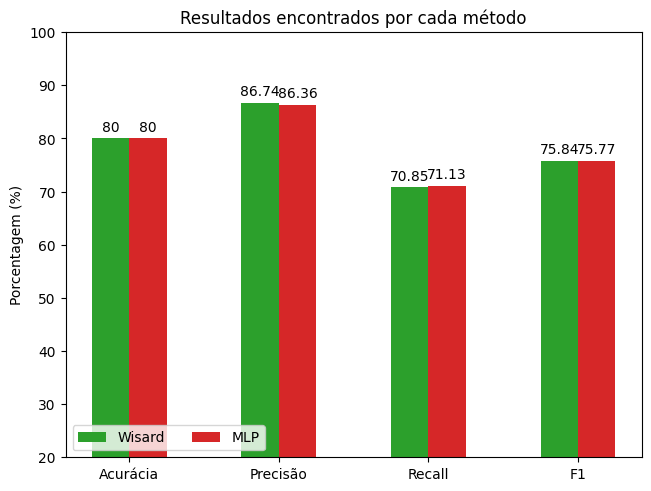

In [47]:

import matplotlib.pyplot as plt
import numpy as np

measurements = ("Acurácia", "Precisão", "Recall", "F1")
methods = {
    'Wisard': (acc, prec, recall, f1),
    'MLP': (80.00, 86.36, 71.13, 75.77), # Resultados obtidos em: https://github.com/GabrielaPC/MultiLayerPerceptron 
}

x = np.arange(len(measurements))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in methods.items():
    if attribute == 'Wisard':
        color = "tab:green"
    else:
        color = "tab:red"

    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=color)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Porcentagem (%)')
ax.set_title('Resultados encontrados por cada método')
ax.set_xticks(x + width/2, measurements)
ax.legend(loc='lower left', ncols=3)
ax.set_ylim(20, 100)

plt.show()